#Técnicas de Aumento de Datos para Imágenes

## 1. Configuración Inicial

Importar librerías necesarias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, util
from scipy import ndimage
import random

# Configurar estilo de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

### EXPLICACIÓN

En este fragmento se importan varias librerías esenciales para el procesamiento y visualización de imágenes. Se utiliza OpenCV (cv2) para operaciones avanzadas con imágenes y visión por computadora, NumPy (np) para manejo de arreglos numéricos, y Matplotlib (plt) para la visualización gráfica. Además, se integran funciones de scikit-image (io, transform, util) para cargar, transformar y manipular imágenes, junto con SciPy (ndimage) para aplicar filtros y operaciones sobre matrices multidimensionales. También se importa el módulo random para generar valores aleatorios que pueden ser útiles en transformaciones o experimentos.

Por último, se configuran los parámetros de visualización: plt.style.use('ggplot') aplica un estilo gráfico similar al de la librería de R ggplot2, y plt.rcParams['figure.figsize'] establece el tamaño por defecto de las figuras en 12 × 8 pulgadas. De esta manera, el entorno queda listo para realizar tareas de procesamiento de imágenes con resultados visualmente claros y consistentes.

## 2. Cargar y Visualizar Imagen de Ejemplo

Dimensiones originales: (630, 1200, 3)
Dimensiones después de procesamiento: (128, 128)


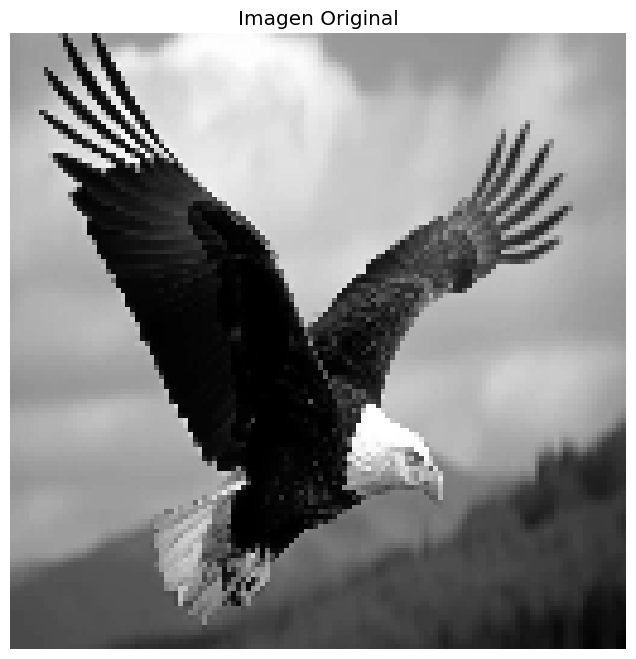

In [2]:
# Cargar imagen de ejemplo (usaremos un dígito del dataset MNIST)
img_url = "https://content.nationalgeographic.com.es/medio/2024/06/18/shutterstock-2364347943_7b6b9957_240618122102_1200x630.jpg"
img = io.imread(img_url)

# Convertir a escala de grises y redimensionar
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_resized = cv2.resize(img_gray, (128, 128))

print(f"Dimensiones originales: {img.shape}")
print(f"Dimensiones después de procesamiento: {img_resized.shape}")

# Mostrar imagen original
plt.imshow(img_resized, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

### EXPLICACIÓN

En este bloque se carga una imagen desde una URL utilizando io.imread, en este caso una fotografía tomada de National Geographic. Una vez obtenida, la imagen se convierte a escala de grises mediante cv2.cvtColor, lo cual simplifica la información al trabajar con un solo canal de intensidad en lugar de los tres canales RGB. Posteriormente, se redimensiona a un tamaño de 128 × 128 píxeles con cv2.resize, lo que permite trabajar con una resolución manejable y uniforme para futuros análisis o aplicaciones de visión artificial.

Después del preprocesamiento, el código imprime en consola las dimensiones originales y las resultantes, mostrando así la transformación aplicada. Finalmente, se visualiza la imagen procesada en escala de grises con matplotlib, sin ejes visibles y con un título descriptivo. Esto permite corroborar de manera visual que los pasos de conversión y redimensionamiento se han ejecutado correctamente.

## 3. Técnicas de Aumento de Datos

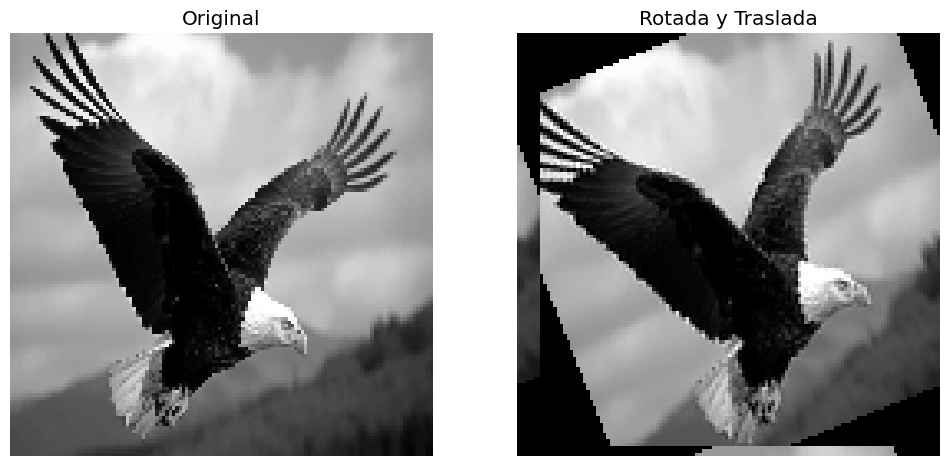

In [3]:
def rotate_and_translate(image, angle_range=(-30, 30), translate_range=(-10, 10)):
    """Aplica rotación y traslación aleatoria"""
    # Rotación
    angle = random.uniform(angle_range[0], angle_range[1])
    rotated = ndimage.rotate(image, angle, reshape=False)

    # Traslación
    tx = random.uniform(translate_range[0], translate_range[1])
    ty = random.uniform(translate_range[0], translate_range[1])
    translated = np.roll(rotated, int(tx), axis=1)
    translated = np.roll(translated, int(ty), axis=0)

    return translated

# Aplicar transformación
transformed_img = rotate_and_translate(img_resized)

# Mostrar resultado
plt.subplot(121)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(transformed_img, cmap='gray')
plt.title('Rotada y Traslada')
plt.axis('off')
plt.show()

### EXPLICACIÓN

En este bloque se define la función rotate_and_translate, que aplica transformaciones aleatorias a una imagen. Primero, la función genera un ángulo de rotación aleatorio dentro del rango especificado (-30° a 30°) y rota la imagen con ndimage.rotate sin cambiar su tamaño (reshape=False). Luego, se calculan desplazamientos horizontales y verticales (tx y ty) dentro del rango definido, y se aplican usando np.roll para trasladar la imagen sobre los ejes X e Y.

A continuación, se aplica la función a la imagen previamente redimensionada y se visualizan los resultados. Se muestran lado a lado la imagen original y la imagen transformada, permitiendo comparar los efectos de la rotación y traslación aleatoria. Este tipo de técnicas son útiles en visión por computadora y aprendizaje automático para aumentar la diversidad de datos y mejorar la robustez de los modelos.

## 3.2. Zoom y Recorte Aleatorio

In [4]:
def random_zoom_crop(image, zoom_range=(0.8, 1.2), crop_size=(112, 112)):
    """Aplica zoom aleatorio y recorte"""
    h, w = image.shape

    # Aplicar zoom
    zoom_factor = random.uniform(zoom_range[0], zoom_range[1])
    zoomed = ndimage.zoom(image, zoom_factor)

    # Recortar al tamaño deseado
    new_h, new_w = zoomed.shape
    start_h = random.randint(0, new_h - crop_size[0])
    start_w = random.randint(0, new_w - crop_size[1])

    cropped = zoomed[start_h:start_h+crop_size[0], start_w:start_w+crop_size[1]]

    return cropped

# Aplicar transformación
zoomed_cropped = random_zoom_crop(img_resized)

# Mostrar resultado
plt.subplot(121)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(zoomed_cropped, cmap='gray')
plt.title('Zoom y Recorte')
plt.axis('off')
plt.show()

ValueError: empty range in randrange(0, -1)

### EXPLICACIÓN

En este bloque se define la función random_zoom_crop, que aplica un zoom aleatorio y un recorte a la imagen. Primero, se genera un factor de zoom dentro del rango especificado (0.8 a 1.2) y se amplía o reduce la imagen con ndimage.zoom. Luego, se realiza un recorte aleatorio de tamaño fijo (112 × 112 píxeles) seleccionando de manera aleatoria el punto de inicio dentro de la imagen ampliada o reducida.

A continuación, la función se aplica a la imagen redimensionada y se muestran los resultados en comparación con la imagen original. Este tipo de transformación es útil para aumentar la variedad de los datos en tareas de visión por computadora, ayudando a los modelos a generalizar mejor frente a cambios de escala y posiciones dentro de la imagen.

## 3.3. Añadir Ruido

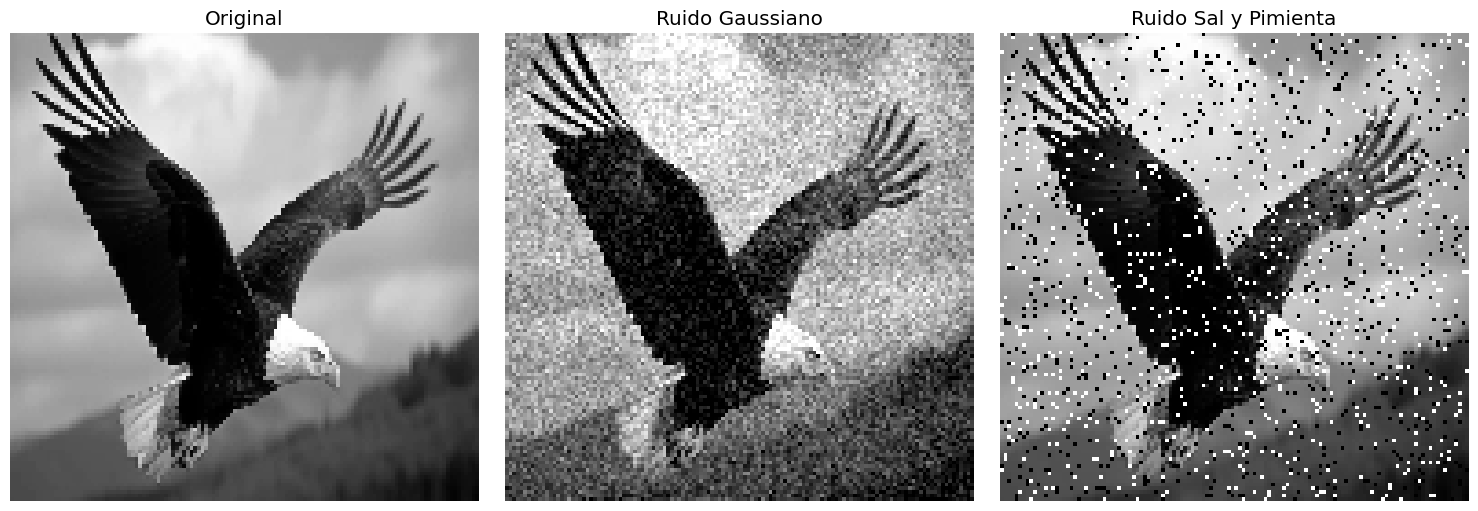

In [5]:
# %%
def add_noise(image, noise_type='gaussian', intensity=0.1):
    """Añade ruido a la imagen"""
    noisy = image.copy().astype(float)

    if noise_type == 'gaussian':
        # Ruido gaussiano
        noise = np.random.normal(0, intensity * 255, image.shape)
        noisy = np.clip(noisy + noise, 0, 255)

    elif noise_type == 'salt_pepper':
        # Ruido sal y pimienta
        salt_prob = intensity / 2
        pepper_prob = intensity / 2

        # Añadir sal (píxeles blancos)
        salt_mask = np.random.random(image.shape) < salt_prob
        noisy[salt_mask] = 255

        # Añadir pimienta (píxeles negros)
        pepper_mask = np.random.random(image.shape) < pepper_prob
        noisy[pepper_mask] = 0

    return noisy.astype(np.uint8)

# Aplicar ruido gaussiano
noisy_gaussian = add_noise(img_resized, noise_type='gaussian', intensity=0.1)

# Aplicar ruido sal y pimienta
noisy_salt_pepper = add_noise(img_resized, noise_type='salt_pepper', intensity=0.1)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(noisy_gaussian, cmap='gray')
plt.title('Ruido Gaussiano')
plt.axis('off')

plt.subplot(133)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('Ruido Sal y Pimienta')
plt.axis('off')

plt.tight_layout()
plt.show()

### EXPLICACIÓN

En este bloque se define la función add_noise, que añade ruido artificial a una imagen para simular variaciones y hacer más robustos los modelos de visión por computadora. La función soporta dos tipos de ruido: gaussiano, que suma valores aleatorios siguiendo una distribución normal, y sal y pimienta, que convierte aleatoriamente algunos píxeles en negro o blanco. La intensidad del ruido se controla mediante un parámetro que determina la magnitud o la proporción de píxeles afectados.

Luego, la función se aplica a la imagen redimensionada para generar dos versiones con ruido: una con ruido gaussiano y otra con ruido sal y pimienta. Finalmente, se muestran las imágenes lado a lado junto con la original, lo que permite visualizar cómo las perturbaciones afectan la imagen y entender cómo podrían impactar en tareas de reconocimiento o clasificación.

## 3.4. Filtros Espaciales

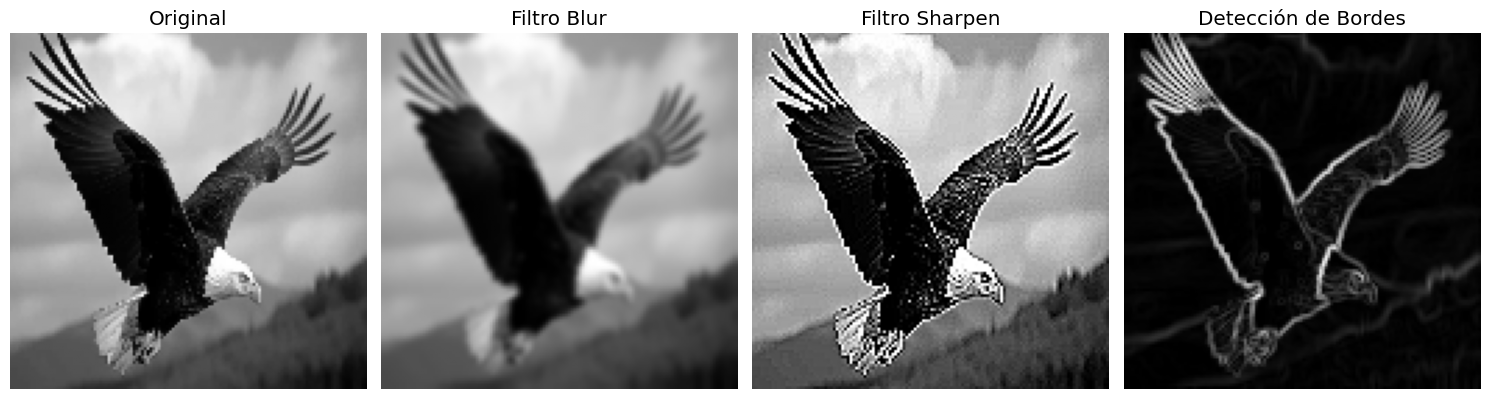

In [6]:
# %%
def apply_filter(image, filter_type='blur'):
    """Aplica filtros espaciales"""
    if filter_type == 'blur':
        filtered = cv2.GaussianBlur(image, (5, 5), 0)
    elif filter_type == 'sharpen':
        kernel = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])
        filtered = cv2.filter2D(image, -1, kernel)
    elif filter_type == 'edge':
        # Detección de bordes con Sobel
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        filtered = np.sqrt(sobel_x**2 + sobel_y**2)
        filtered = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX)

    return filtered.astype(np.uint8)

# Aplicar diferentes filtros
blurred = apply_filter(img_resized, 'blur')
sharpened = apply_filter(img_resized, 'sharpen')
edges = apply_filter(img_resized, 'edge')

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(blurred, cmap='gray')
plt.title('Filtro Blur')
plt.axis('off')

plt.subplot(143)
plt.imshow(sharpened, cmap='gray')
plt.title('Filtro Sharpen')
plt.axis('off')

plt.subplot(144)
plt.imshow(edges, cmap='gray')
plt.title('Detección de Bordes')
plt.axis('off')

plt.tight_layout()
plt.show()

### EXPLICACIÓN

En este bloque se define la función apply_filter, que permite aplicar filtros espaciales a una imagen para resaltar o modificar ciertas características. La función soporta tres tipos de filtros: blur (desenfoque) mediante GaussianBlur para suavizar la imagen, sharpen (enfoque) usando un kernel de realce para resaltar detalles, y edge (detección de bordes) mediante el operador Sobel, que calcula gradientes horizontales y verticales y destaca los contornos presentes en la imagen.

A continuación, se aplican estos filtros a la imagen redimensionada y se muestran los resultados junto con la original en una visualización lado a lado. Esta representación permite observar cómo cada filtro afecta la imagen: el desenfoque suaviza los detalles, el enfoque los resalta y la detección de bordes resalta contornos, lo que resulta útil en tareas de preprocesamiento y análisis en visión por computadora.

##3.5. Alteración de Color

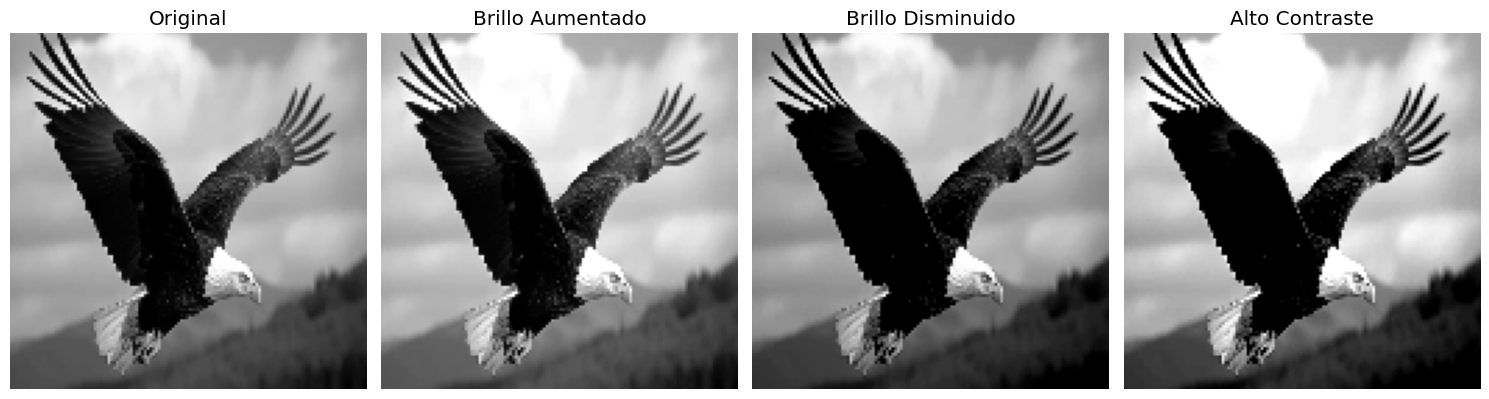

In [7]:
# %%
def adjust_color(image, brightness=0, contrast=0, saturation=0):
    """Ajusta brillo, contraste y saturación"""
    adjusted = image.copy().astype(float)

    # Ajustar brillo
    adjusted = np.clip(adjusted + brightness, 0, 255)

    # Ajustar contraste
    if contrast != 0:
        mean = np.mean(adjusted)
        adjusted = (contrast * (adjusted - mean) + mean)
        adjusted = np.clip(adjusted, 0, 255)

    # Ajustar saturación (solo para imágenes RGB)
    if len(image.shape) == 3:
        hsv = cv2.cvtColor(adjusted.astype(np.uint8), cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        s = np.clip(s * (1 + saturation/100), 0, 255)
        hsv = cv2.merge([h, s, v])
        adjusted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return adjusted.astype(np.uint8)

# Aplicar ajustes de color
brightened = adjust_color(img_resized, brightness=30)
darkened = adjust_color(img_resized, brightness=-30)
high_contrast = adjust_color(img_resized, contrast=1.5)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(brightened, cmap='gray')
plt.title('Brillo Aumentado')
plt.axis('off')

plt.subplot(143)
plt.imshow(darkened, cmap='gray')
plt.title('Brillo Disminuido')
plt.axis('off')

plt.subplot(144)
plt.imshow(high_contrast, cmap='gray')
plt.title('Alto Contraste')
plt.axis('off')

plt.tight_layout()
plt.show()

### EXPLICACIÓN

En este bloque se define la función adjust_color, que permite modificar el brillo, el contraste y la saturación de una imagen. Primero, se ajusta el brillo sumando o restando un valor a los píxeles, asegurando que los valores resultantes estén entre 0 y 255. Luego, se ajusta el contraste multiplicando la diferencia entre cada píxel y la media de la imagen por un factor de contraste, también recortando los valores fuera del rango permitido. Para imágenes RGB, se puede modificar la saturación convirtiéndolas a espacio HSV y ajustando el canal de saturación.

A continuación, se aplican distintos ajustes a la imagen redimensionada y se muestran los resultados junto con la original: un brillo aumentado, un brillo disminuido y un alto contraste. Esta visualización permite observar cómo estos cambios afectan la apariencia de la imagen, lo cual es útil en procesamiento de imágenes y para generar variantes en técnicas de aumento de datos en visión por computadora.

## 4. Combinación de Técnicas

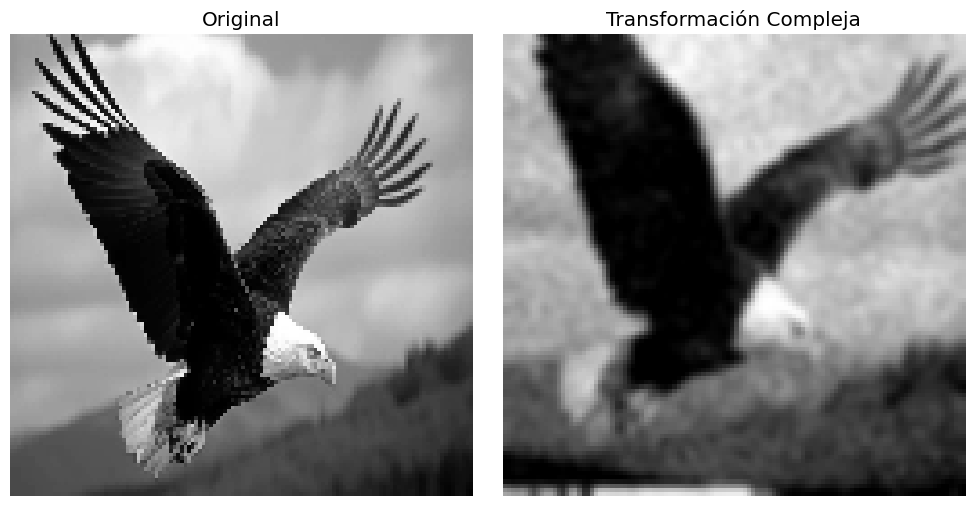

In [8]:
# %%
def complex_augmentation(image):
    """Combina múltiples técnicas de aumento"""
    # Aplicar varias transformaciones secuencialmente
    augmented = image.copy()

    # 1. Rotación y traslación
    augmented = rotate_and_translate(augmented)

    # 2. Zoom y recorte
    augmented = random_zoom_crop(augmented)

    # 3. Añadir ruido gaussiano
    augmented = add_noise(augmented, noise_type='gaussian', intensity=0.08)

    # 4. Aplicar filtro de desenfoque
    augmented = apply_filter(augmented, 'blur')

    # 5. Ajustar brillo ligeramente
    augmented = adjust_color(augmented, brightness=random.uniform(-10, 10))

    return augmented

# Aplicar transformación compuesta
complex_augmented = complex_augmentation(img_resized)

# Mostrar resultado final
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img_resized, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(complex_augmented, cmap='gray')
plt.title('Transformación Compleja')
plt.axis('off')

plt.tight_layout()
plt.show()

### EXPLICACIÓN

En este bloque se define la función complex_augmentation, que combina múltiples técnicas de aumento de datos para generar una versión transformada y más diversa de la imagen. La función aplica secuencialmente rotación y traslación, zoom y recorte, añade ruido gaussiano, aplica un filtro de desenfoque y ajusta ligeramente el brillo de manera aleatoria. Esto permite crear imágenes variantes que conservan la información original pero introducen cambios que simulan condiciones distintas.

Luego, la transformación compuesta se aplica a la imagen redimensionada y se muestra junto con la original. La comparación visual permite observar cómo estas combinaciones afectan la imagen, lo que es especialmente útil en visión por computadora para aumentar la robustez de modelos de aprendizaje automático y reducir el sobreajuste al entrenar con conjuntos de datos limitados.